Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [12]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        # YOUR CODE HERE
        x_vec = self.xk
        y = self.yk
        x_num = x
        P = 0
        for i in range (len(y)):
          #lk = count_lk(x_num, x_vec, i, m)
            lk = 1
            for j in range (len(x_vec)):
              if (j != i):
                lk = lk * (x_num - x_vec[j])/(x_vec[i] - x_vec[j])
            P += y[i] * lk
        return P

In [13]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


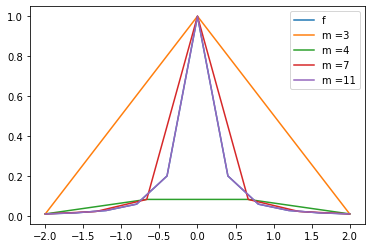

In [22]:
import matplotlib.pyplot as plt
xx = np.linspace(-2, 2, 11)
yy = runge_func(xx)
plt.plot(xx, yy, label = 'f')
for m in [3, 4, 7, 11]:
  xx = np.linspace(-2, 2, m)
  yy = runge_func(xx)
  lagr = LagrangeInterpolator(xx, yy)
  plt.plot(xx, lagr(xx), label='m ='+str(m))
plt.legend()

In [23]:
def chebyshev_nodes(a, b, k):
  x = np.zeros(k)
  for i in range(1, k + 1):
    x[i - 1] = 1/2 * (a + b) + 1/2 * (b - a) * np.cos(((2 * i - 1)  * np.pi) /(2 * k))
  return x

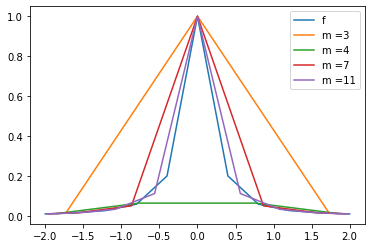

In [24]:
xx = np.linspace(-2, 2, 11)
yy = runge_func(xx)
plt.plot(xx, yy, label = 'f')
for m in [3, 4, 7, 11]:
  xx = chebyshev_nodes(-2, 2, m)
  yy = runge_func(xx)
  lagr = LagrangeInterpolator(xx, yy)
  plt.plot(xx, lagr(xx), label='m ='+str(m))
plt.legend()